In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 데이터 읽어와서 출력하기

In [4]:
csv_path = "google-stock-dataset-Monthly.csv"
df = pd.read_csv(csv_path, usecols = range(1,7))
df

,Date,Price,High,Low,Close,Volume
0,2013-05-01,20.60,23.04,20.43,21.80,1974715308
1,2013-06-01,21.85,22.79,21.20,22.03,1941280776
2,2013-07-01,22.18,23.22,21.91,22.22,2047770180
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060
...,...,...,...,...,...,...
115,2022-12-01,101.02,102.25,85.94,88.23,603127800
116,2023-01-01,89.59,100.32,84.86,98.84,672897800
117,2023-02-01,98.71,108.18,88.58,90.06,952580200
118,2023-03-01,89.98,106.59,89.42,103.73,859911400


In [5]:
df.dtypes

Date       object
Price     float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### 2. 종가 데이터 사용하여 그래프 만들어보기

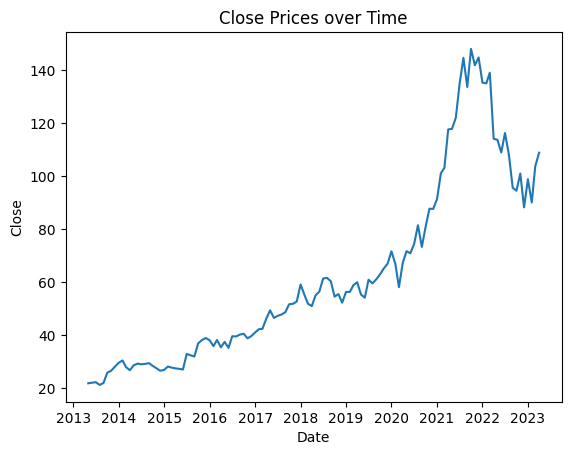

In [10]:
# 날짜 데이터로 변환
df['Date'] = pd.to_datetime(df['Date'])

# x축, y축 순서로 입력
plt.plot(df['Date'], df['Close'])

# 그래프 이름
plt.title('Close Prices over Time')

# 레이블
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

### 3. 최저, 최고가 출력

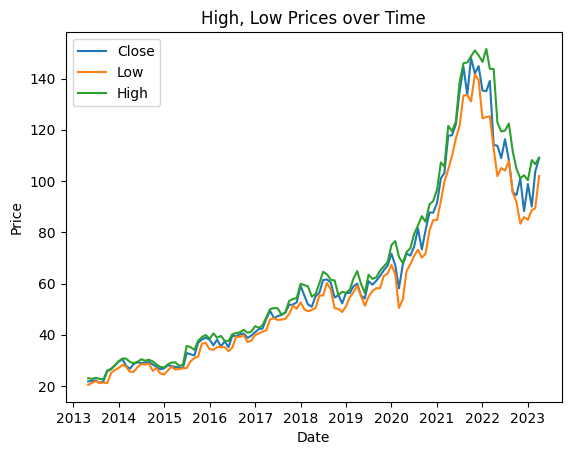

In [14]:
plt.plot(df['Date'], df['Close'], label = 'Close')
plt.plot(df['Date'], df['Low'], label = 'Low')
plt.plot(df['Date'], df['High'], label = 'High')

plt.title('High, Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# 범례 표시
plt.legend()

plt.show()

### 4. 데이터 가공(2022년 이후의 최고, 최저가) == 데이터 전처리

In [16]:
new_df = pd.read_csv(csv_path, usecols = range(1, 7))

# 2022년 이후 데이터 필터링
df_after_2022 = new_df[new_df['Date'] >= "2022-01-01"]
df_after_2022

,Date,Price,High,Low,Close,Volume
104,2022-01-01,145.05,146.49,124.50,135.30,767206000
105,2022-02-01,137.59,151.55,124.95,135.06,928126000
106,2022-03-01,134.88,143.79,125.28,139.07,729162000
107,2022-04-01,139.50,143.71,112.74,114.11,761152000
108,2022-05-01,113.40,122.85,101.88,113.76,850450000
109,2022-06-01,114.86,119.35,105.05,108.96,770754000
110,2022-07-01,107.93,119.68,104.07,116.32,789529700
111,2022-08-01,115.30,122.43,107.80,108.22,515852700
112,2022-09-01,108.28,111.62,95.56,95.65,613278900
113,2022-10-01,96.76,104.82,91.80,94.51,681488300


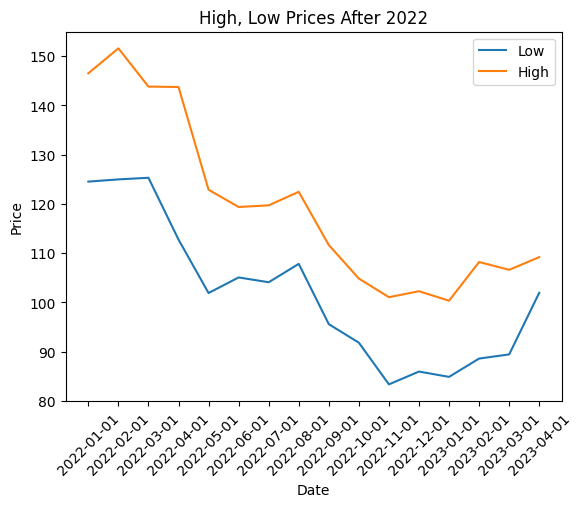

In [19]:
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label = 'Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label = 'High')

plt.title('High, Low Prices After 2022')
plt.xlabel('Date')
plt.ylabel('Price')

# x축 45도 회전
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [26]:
exchange_rate = 1450

# 각 컬럼을 원화로 계산
df['High(won)'] = df['High'] * exchange_rate
df['Low(won)'] = df['Low'] * exchange_rate
df['Close(won)'] = df['Close'] * exchange_rate
df = df[new_df['Date'] >= "2022-01-01"]
df

C:\Users\User\AppData\Local\Temp\ipykernel_9540\3796782855.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[new_df['Date'] >= "2022-01-01"]


,Date,Price,High,Low,Close,Volume,High(won),Low(won),Close(won)
104,2022-01-01,145.05,146.49,124.50,135.30,767206000,212410.5,180525.0,196185.0
105,2022-02-01,137.59,151.55,124.95,135.06,928126000,219747.5,181177.5,195837.0
106,2022-03-01,134.88,143.79,125.28,139.07,729162000,208495.5,181656.0,201651.5
107,2022-04-01,139.50,143.71,112.74,114.11,761152000,208379.5,163473.0,165459.5
108,2022-05-01,113.40,122.85,101.88,113.76,850450000,178132.5,147726.0,164952.0
109,2022-06-01,114.86,119.35,105.05,108.96,770754000,173057.5,152322.5,157992.0
110,2022-07-01,107.93,119.68,104.07,116.32,789529700,173536.0,150901.5,168664.0
111,2022-08-01,115.30,122.43,107.80,108.22,515852700,177523.5,156310.0,156919.0
112,2022-09-01,108.28,111.62,95.56,95.65,613278900,161849.0,138562.0,138692.5
113,2022-10-01,96.76,104.82,91.80,94.51,681488300,151989.0,133110.0,137039.5


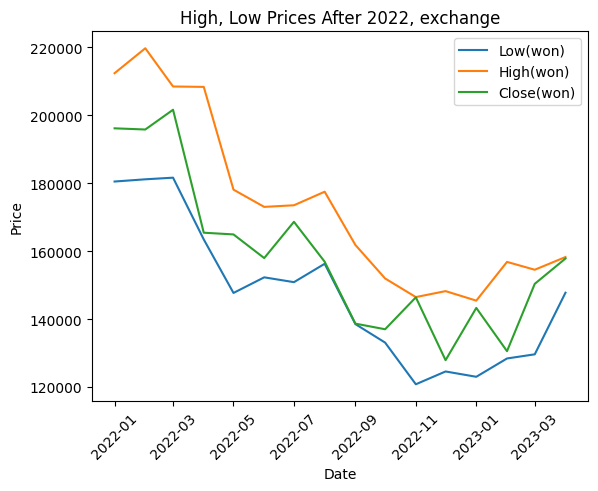

In [27]:
plt.plot(df['Date'], df['Low(won)'], label = 'Low(won)')
plt.plot(df['Date'], df['High(won)'], label = 'High(won)')
plt.plot(df['Date'], df['Close(won)'], label = 'Close(won)')

plt.title('High, Low Prices After 2022, exchange')
plt.xlabel('Date')
plt.ylabel('Price')

# x축 45도 회전
plt.xticks(rotation=45)

plt.legend()
plt.show()

### 6. 간단한 데이터 분석(상관 관계)

In [35]:
# 마지막 1년 + 1개월 데이터 추출
df = df.tail(13)

# iloc는 행, 마지막 행만 할당
last_month_close = df['Close'].iloc[-1]

# 마지막 행을 제외한 1년의 데이터
High_Close = df['High'].iloc[:-1]
Low_Close = df['Low'].iloc[:-1]
Volume_Close = df['Volume'].iloc[:-1]

# .corr() 메서드 사용
# 1에 가까울 수록 상관관계가 크다
# 0에 가까울 수록 상관관계가 없다
# -1에 가까울 수록 상관관계 반비례
High_Close_corr = High_Close.corr(df['Close'])
Low_Close_corr = Low_Close.corr(df['Close'])
Volume_Close_corr = Volume_Close.corr(df['Close'])

# 분석결과 출력
print(f'High와 Close의 상관관계: {High_Close_corr}')
print(f'Low와 Close의 상관관계: {Low_Close_corr}')
print(f'Volume과 Close의 상관관계: {Volume_Close_corr}')
print(f'평균 최고가: {df['High'].iloc[:-1].mean()} ')
print(f'평균 최저가: {df['Low'].iloc[:-1].mean()} ')
print(f'평균 거래량: {df['Volume'].iloc[:-1].mean()}')

High와 Close의 상관관계: 0.7467644674963533
Low와 Close의 상관관계: 0.7784705369457524
Volume과 Close의 상관관계: 0.16764687924467012
평균 최고가: 113.57 
평균 최저가: 95.92000000000002 
평균 거래량: 732295458.3333334


### 분석결과
    지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관관계 : 0.74
    지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관관계 : 0.77
    일반적으로 0.7 이상의 점수 : 강한 상관관계
    
    즉, 3월과 4월의 최고가, 최저가가 상향하는 것으로 보인다.
    5월에도 오를 것으로 보이니 매수하자(잘못된 분석ㅋㅋ)